In [1]:
import numpy as np
import wget

In [2]:
#data = ['house','tree', 'bicycle']
#for item in data:
#    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/' +item +'.npy'
#    wget.download(url)

In [3]:
#ipython magic numpy and matplotlib import function
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [4]:
house_images = np.load('house.npy')
tree_images = np.load('tree.npy')
bicycle_images = np.load('bicycle.npy')


In [5]:
tree_house_df = np.zeros((2500,64,64,1))
for i in range(2500):
    img_generated = np.zeros((64,64))
    random_index = random.randint(0,5000)
    house_images_copy = house_images[random_index,:]/255
    tree_images_copy = tree_images[random_index,:]/255
    if random.random() < 0.5:
        img_generated[17:45,0:28] = house_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = tree_images_copy.reshape((28, 28))
    else:
        img_generated[17:45,0:28] = tree_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = house_images_copy.reshape((28, 28))
    tree_house_df[i] = img_generated.reshape((64,64,1))

In [6]:
tree_house_df.shape

(2500, 64, 64, 1)

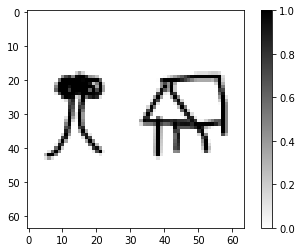

In [8]:
imshow(tree_house_df[52].reshape((64,64)), cmap = 'binary')
colorbar()

In [9]:
tree_bicycle_df = np.zeros((2500,64,64,1))
for i in range(2500):
    img_generated = np.zeros((64,64))
    random_index = random.randint(0,5000)
    bicycle_images_copy = bicycle_images[random_index,:]/255
    tree_images_copy = tree_images[random_index,:]/255
    if random.random() < 0.5:
        img_generated[17:45,0:28] = tree_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = bicycle_images_copy.reshape((28, 28))
    else:
        img_generated[17:45,0:28] = bicycle_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = tree_images_copy.reshape((28, 28))
    tree_bicycle_df[i] = img_generated.reshape((64,64,1))

In [10]:
house_bicycle_df = np.zeros((2500,64,64,1))
for i in range(2500):
    img_generated = np.zeros((64,64))
    random_index = random.randint(0,5000)
    house_images_copy = house_images[random_index,:]/255
    bicycle_images_copy = bicycle_images[random_index,:]/255
    if random.random() < 0.5:
        img_generated[17:45,0:28] = house_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = bicycle_images_copy.reshape((28, 28))
    else:
        img_generated[17:45,0:28] = bicycle_images_copy.reshape((28, 28))
        img_generated[17:45,32:60] = house_images_copy.reshape((28, 28))
    house_bicycle_df[i] = img_generated.reshape((64,64,1))

In [11]:
image_raw = np.vstack((tree_house_df,tree_bicycle_df,house_bicycle_df))

In [12]:
image_labels = np.concatenate((np.repeat(0, 2500),np.repeat(1, 2500),np.repeat(2, 2500)), axis=None)

In [13]:
image_labels.shape

(7500,)

In [14]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [15]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from keras.backend.tensorflow_backend import set_session
tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True
set_session(tf.Session(config=tf_config))

Using TensorFlow backend.


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(image_raw, image_labels, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)

(6000, 64, 64, 1)


In [19]:
print(X_test.shape)

(1500, 64, 64, 1)


In [20]:
from keras.layers import Dense, Input
from keras.models import Model

In [21]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

#x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#conv1 = Conv2D(16, kernel_size=3, activation='relu')(input_img)
#pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
#conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
#pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#conv3 = Conv2D(8, kernel_size=3, activation='relu')(pool2)
#encoded = MaxPooling2D(pool_size=(2, 2))(conv3)
#conv3 = Conv2D(8, kernel_size=3, activation='relu')(encoded)
#pool3 = UpSampling2D((2, 2))(conv3)
#conv2 = Conv2D(8, kernel_size=3, activation='relu')(pool3)
#pool2 = UpSampling2D((2, 2))(conv2)
#conv1 = Conv2D(16, kernel_size=3, activation='relu')(pool2)
#pool1 = UpSampling2D((2, 2))(conv1)
#decoded = Conv2D(1, kernel_size=3, activation='sigmoid')(pool1)

x = Conv2D(16, kernel_size=4, activation='relu')(input_img)
x = Conv2D(32, kernel_size=4, activation='relu')(x)
x = Conv2D(64, kernel_size=4, activation='relu')(x)
x = Conv2D(128, kernel_size=4, activation='relu')(x)
encoded = Conv2D(100, kernel_size=4, activation='sigmoid')(x)
x = Conv2DTranspose(128, kernel_size=4, activation='relu')(encoded)
x = Conv2DTranspose(64, kernel_size=4, activation='relu')(x)
x = Conv2DTranspose(32, kernel_size=4, activation='relu')(x)
x = Conv2DTranspose(16, kernel_size=4, activation='relu')(x)
decoded = Conv2DTranspose(1, kernel_size=4, activation='sigmoid')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
autoencoder.fit(X_train, X_train, epochs=5, batch_size=24, shuffle=True, validation_data=(X_test, X_test))

Train on 6000 samples, validate on 1500 samples
Epoch 1/5
6000/6000 [==============================] - 98s - loss: 0.1457 - val_loss: 0.0814
Epoch 2/5
6000/6000 [==============================] - 97s - loss: 0.0635 - val_loss: 0.0570
Epoch 3/5
6000/6000 [==============================] - 99s - loss: 0.0543 - val_loss: 0.0524
Epoch 4/5
6000/6000 [==============================] - 99s - loss: 0.0505 - val_loss: 0.0491
Epoch 5/5
6000/6000 [==============================] - 100s - loss: 0.0485 - val_loss: 0.0487


In [ ]:
decoded_imgs = autoencoder.predict(X_test)

n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1+n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = Model(inputs = input_img, outputs = encoded)

In [ ]:
X_test_enc = encoder.predict(X_test)

In [ ]:
imshow(X_test[0].reshape((64,64)))

In [ ]:
imshow(X_test[7].reshape((64,64)))

In [ ]:
X_test_enc[0].ravel()

In [ ]:
X_test_enc[7].ravel()

In [ ]:
from scipy.spatial import distance
distance.jaccard(X_test_enc[0].ravel(), X_test_enc[7].ravel())